
Vary this

1. Model params/layers
2. No. training epochs
3. Shuffling training data
4. Reduce/filter away None events


In [1]:
import numpy as np
import pandas as pd
import wave
import math
import matplotlib.pyplot as plt
import tensorflow as tf

from data_ml import get_ml_data
from data_plot import plot_samples_events_individual


In [2]:
BRAINBOX_SAMPLE_RATE = 10000

EVENT_ID_MAP = {
    None: 0,
    "L": 1,
    "R": 2,
    "S": 3,
}
EVENT_ID_LETTER_MAP = {EVENT_ID_MAP[i]:i for i in EVENT_ID_MAP}

EVENT_COLOR_MAP = {
    None: "black",
    "L": "red",
    "R": "blue",
    "S": "green",
}

EVENT_ID_NAME_MAP = {
    0: "Nothing",
    1: "Left Wink",
    2: "Right Wink",
    3: "Dbl Blink",
}

EVENTS_PATH = "../src/data_collection/data/events/"
SAMPLES_PATH = "../src/data_collection/data/waves/"

FILE_NAMES_TRAIN = [
    "DATA_2022-05-12_Josh_0001_0_1652333343",
    "DATA_2022-05-12_Josh_0001_0_1652333800",
    
    "DATA_2022-05-12_Josh_0001_1_1652334198",
    "DATA_2022-05-12_Josh_0001_1_1652334982",
    
    "DATA_2022-05-12_Josh_0001_2_1652335485",
    "DATA_2022-05-12_Josh_0001_2_1652336009",
]

FILE_NAMES_TEST = [
    "DATA_2022-05-12_Josh_0001_0_1652333343",
    "DATA_2022-05-12_Josh_0001_0_1652333800",
    
    "DATA_2022-05-12_Josh_0001_1_1652334198",
    "DATA_2022-05-12_Josh_0001_1_1652334982",
    
    "DATA_2022-05-12_Josh_0001_2_1652335485",
    "DATA_2022-05-12_Josh_0001_2_1652336009",
]

DOWNSAMPLE_RATE = 100

EVENT_LENGTH = 2 # length of a given event sequence in seconds
EVENT_SAMPLE_COUNT = int(EVENT_LENGTH * BRAINBOX_SAMPLE_RATE / DOWNSAMPLE_RATE) # size of event in samples

EVENT_START = -1.25
EVENT_START_OFFSET = int(EVENT_START * BRAINBOX_SAMPLE_RATE / DOWNSAMPLE_RATE)

EVENT_END = -0.75
EVENT_END_OFFSET = int(EVENT_END * BRAINBOX_SAMPLE_RATE / DOWNSAMPLE_RATE)

INPUT_SHAPE = (EVENT_SAMPLE_COUNT,)
OUTPUT_SHAPE = len(EVENT_ID_MAP)  # number of categories (including None)

# TRAIN_TEST_RATIO = 0.7
# TRAIN_TEST_RATIO = 0
# TRAIN_TEST_RATIO = 1

In [3]:
train_data_all, train_labels_all = get_ml_data(
    events_path = EVENTS_PATH,
    samples_path = SAMPLES_PATH,
    file_names = FILE_NAMES_TRAIN,
    
    event_id_map = EVENT_ID_MAP,
    event_color_map = EVENT_COLOR_MAP,

    event_sample_count = EVENT_SAMPLE_COUNT,
    event_start = EVENT_START,
    event_end = EVENT_END,
    
    downsample_rate = DOWNSAMPLE_RATE,
    shuffle_data = False,
    filter_data = True,
)

print(train_data_all.shape, train_data_all)
print(train_labels_all.shape, train_labels_all)

Loading ML data from 6 files

Loading sample file DATA_2022-05-12_Josh_0001_0_1652333343
Loaded 1963955 samples
Downsampling @ n=100
Downsampled to 19639 samples
Loading event file DATA_2022-05-12_Josh_0001_0_1652333343
Loaded {len(events_df)} events
Merging samples and events
Merge complete
Transforming data into individual sequences...
Transformed into 19439 sequences of size 200

Loading sample file DATA_2022-05-12_Josh_0001_0_1652333800
Loaded 1751918 samples
Downsampling @ n=100
Downsampled to 17519 samples
Loading event file DATA_2022-05-12_Josh_0001_0_1652333800
Loaded {len(events_df)} events
Merging samples and events
Merge complete
Transforming data into individual sequences...
Transformed into 17319 sequences of size 200

Loading sample file DATA_2022-05-12_Josh_0001_1_1652334198
Loaded 1596573 samples
Downsampling @ n=100
Downsampled to 15965 samples
Loading event file DATA_2022-05-12_Josh_0001_1_1652334198
Loaded {len(events_df)} events
Merging samples and events
Merge comp

In [4]:
test_data, test_labels = get_ml_data(
    events_path = EVENTS_PATH,
    samples_path = SAMPLES_PATH,
    file_names = FILE_NAMES_TEST,
    
    event_id_map = EVENT_ID_MAP,
    event_color_map = EVENT_COLOR_MAP,

    event_sample_count = EVENT_SAMPLE_COUNT,
    event_start = EVENT_START,
    event_end = EVENT_END,
    
    downsample_rate = DOWNSAMPLE_RATE,
    shuffle_data = False,
    filter_data = True,
)

print(test_data.shape, test_data)
print(test_labels.shape, test_labels)

Loading ML data from 6 files

Loading sample file DATA_2022-05-12_Josh_0001_0_1652333343
Loaded 1963955 samples
Downsampling @ n=100
Downsampled to 19639 samples
Loading event file DATA_2022-05-12_Josh_0001_0_1652333343
Loaded {len(events_df)} events
Merging samples and events
Merge complete
Transforming data into individual sequences...
Transformed into 19439 sequences of size 200

Loading sample file DATA_2022-05-12_Josh_0001_0_1652333800
Loaded 1751918 samples
Downsampling @ n=100
Downsampled to 17519 samples
Loading event file DATA_2022-05-12_Josh_0001_0_1652333800
Loaded {len(events_df)} events
Merging samples and events
Merge complete
Transforming data into individual sequences...
Transformed into 17319 sequences of size 200

Loading sample file DATA_2022-05-12_Josh_0001_1_1652334198
Loaded 1596573 samples
Downsampling @ n=100
Downsampled to 15965 samples
Loading event file DATA_2022-05-12_Josh_0001_1_1652334198
Loaded {len(events_df)} events
Merging samples and events
Merge comp

In [13]:
train_filter = (train_labels_all != 0) | (np.random.random(len(train_labels_all)) < 0.25)
train_data = train_data_all[train_filter]
train_labels = train_labels_all[train_filter]

# train_data = train_data_all
# train_labels = train_labels_all

print(train_data.shape, train_data)
print(train_labels.shape, train_labels)

(34295, 200) [[-0.33717994 -0.35629404 -0.37275153 ... -0.74764993 -0.75682962
  -0.7640298 ]
 [-0.79313388 -0.67713212 -0.56690679 ... -0.89184049 -0.94631232
  -1.00238528]
 [-0.00402081 -0.10493368 -0.19656136 ... -0.86768522 -0.86712051
  -0.86466986]
 ...
 [-0.32880783 -0.23701357 -0.15192924 ...  0.33840867  0.50134778
   0.68534059]
 [-0.25609512 -0.1622054  -0.06769584 ...  0.21337406  0.45446494
   0.7087805 ]
 [ 0.34931681  0.29588377  0.24995409 ... -0.52720899 -0.72662925
  -0.94591454]]
(34295,) [0 0 0 ... 2 0 0]


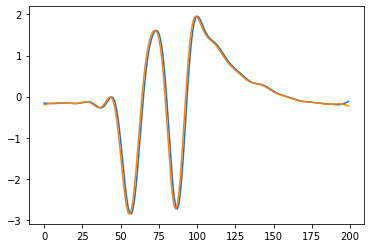

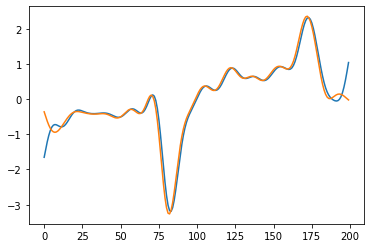

In [14]:
# plt.plot(train_labels)
# plt.show()
# plt.plot(test_labels)
# plt.show()

# plt.plot(seq_data[0])
# print(seq_labels[0])

# plt.ylim(-5, 5)
plt.plot(train_data[2000])
plt.plot(train_data[2001])
plt.show()

# plt.ylim(-5, 5)
plt.plot(test_data[2000])
plt.plot(test_data[2001])
plt.show()

Nothing (0)	21122	61.5892%
Left Wink (1)	4509	13.1477%
Right Wink (2)	4007	11.6839%
Dbl Blink (3)	4657	13.5792%


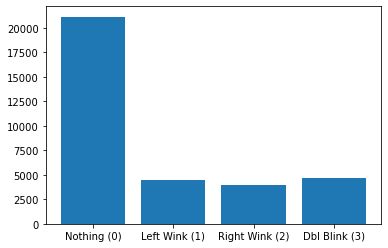

Nothing (0)	84323	86.4887%
Left Wink (1)	4509	 4.6248%
Right Wink (2)	4007	 4.1099%
Dbl Blink (3)	4657	 4.7766%


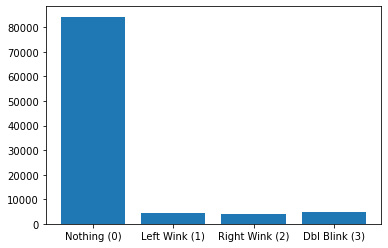

In [15]:
def labels_info(labels):
    # 0 for None, 1 for Left, 2 for Right
    bar_labels, bar_counts = np.unique(labels, return_counts=True)
    bar_labels = [f"{EVENT_ID_NAME_MAP[i]} ({i})" for i in bar_labels]

    for i,c in zip(bar_labels, bar_counts):
        print(f"{i}\t{c}\t{100*c/len(labels):7.4f}%")

    plt.bar(bar_labels, bar_counts)
    plt.show()

labels_info(train_labels)
labels_info(test_labels)

In [16]:
# 85-86% after ~50 epochs
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=INPUT_SHAPE),
    tf.keras.layers.Dropout(.9, input_shape=INPUT_SHAPE),
    
    tf.keras.layers.Dense(32, activation='relu'),
#     tf.keras.layers.Dropout(.2, input_shape=(16,)),

    tf.keras.layers.Dense(16, activation='relu'),

    tf.keras.layers.Dense(OUTPUT_SHAPE)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 200)               0         
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_3 (Dense)             (None, 32)                6432      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 4)                 68        
                                                                 
Total params: 7,028
Trainable params: 7,028
Non-trainable params: 0
_________________________________________________________________


In [14]:
# 1000 epochs 86-87% accuracy
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=INPUT_SHAPE),
    tf.keras.layers.Dropout(.95, input_shape=INPUT_SHAPE),
    
    tf.keras.layers.Dense(32, activation='relu'),
#     tf.keras.layers.Dropout(.2, input_shape=(16,)),

    tf.keras.layers.Dense(16, activation='relu'),

    tf.keras.layers.Dense(OUTPUT_SHAPE)
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 200)               0         
                                                                 
 dropout_2 (Dropout)         (None, 200)               0         
                                                                 
 dense_6 (Dense)             (None, 32)                6432      
                                                                 
 dense_7 (Dense)             (None, 16)                528       
                                                                 
 dense_8 (Dense)             (None, 4)                 68        
                                                                 
Total params: 7,028
Trainable params: 7,028
Non-trainable params: 0
_________________________________________________________________


In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=INPUT_SHAPE),
    tf.keras.layers.Dropout(.8, input_shape=INPUT_SHAPE),
    tf.keras.layers.Dense(16, activation='relu'),
#     tf.keras.layers.Dropout(.2, input_shape=(16,)),
#     tf.keras.layers.Dense(16, activation='relu'),
#     tf.keras.layers.Dropout(.2, input_shape=(16,)),
    tf.keras.layers.Dense(OUTPUT_SHAPE)
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 200)               0         
                                                                 
 dropout_2 (Dropout)         (None, 200)               0         
                                                                 
 dense_6 (Dense)             (None, 16)                3216      
                                                                 
 dense_7 (Dense)             (None, 4)                 68        
                                                                 
Total params: 3,284
Trainable params: 3,284
Non-trainable params: 0
_________________________________________________________________


In [11]:
#
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=INPUT_SHAPE),
    tf.keras.layers.Dropout(.95, input_shape=INPUT_SHAPE),
    
    tf.keras.layers.Dense(64, activation='relu'),
#     tf.keras.layers.Dropout(.2, input_shape=(16,)),

    tf.keras.layers.Dense(32, activation='relu'),

    tf.keras.layers.Dense(OUTPUT_SHAPE)
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 200)               0         
                                                                 
 dropout_3 (Dropout)         (None, 200)               0         
                                                                 
 dense_8 (Dense)             (None, 64)                12864     
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dense_10 (Dense)            (None, 4)                 132       
                                                                 
Total params: 15,076
Trainable params: 15,076
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

EPOCHS = 50

history = model.fit(
    train_data,
    train_labels,
    epochs=EPOCHS,
    validation_data=(test_data, test_labels)
#     batch_size=16
)

Epoch 1/50
1072/1072 [==============================] - 4s 3ms/step - loss: 0.9130 - accuracy: 0.6496 - val_loss: 0.5238 - val_accuracy: 0.8568
Epoch 2/50
1072/1072 [==============================] - 3s 3ms/step - loss: 0.6657 - accuracy: 0.7302 - val_loss: 0.4277 - val_accuracy: 0.8747
Epoch 3/50
1072/1072 [==============================] - 3s 3ms/step - loss: 0.6242 - accuracy: 0.7491 - val_loss: 0.5056 - val_accuracy: 0.8353
Epoch 4/50
1072/1072 [==============================] - 3s 3ms/step - loss: 0.6057 - accuracy: 0.7610 - val_loss: 0.4076 - val_accuracy: 0.8847
Epoch 5/50
1072/1072 [==============================] - 3s 3ms/step - loss: 0.5838 - accuracy: 0.7732 - val_loss: 0.3878 - val_accuracy: 0.8856
Epoch 6/50
1072/1072 [==============================] - 3s 3ms/step - loss: 0.5664 - accuracy: 0.7797 - val_loss: 0.3841 - val_accuracy: 0.8893
Epoch 7/50
1072/1072 [==============================] - 3s 3ms/step - loss: 0.5514 - accuracy: 0.7883 - val_loss: 0.3751 - val_accuracy:

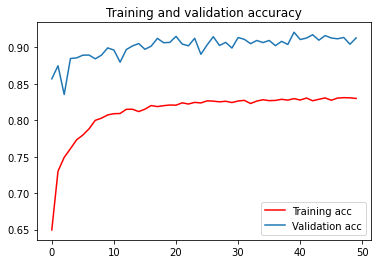

In [18]:
plt.plot(history.history['accuracy'], label='Training acc', color="red")
plt.plot(history.history['val_accuracy'], label='Validation acc')
plt.title('Training and validation accuracy')
# plt.ylim(0.8)
plt.legend()

In [19]:
test_loss, test_acc = model.evaluate(
    test_data,
    test_labels,
    verbose=2
)

print('\nTest accuracy:', test_acc)

3047/3047 - 2s - loss: 0.2585 - accuracy: 0.9129 - 2s/epoch - 694us/step

Test accuracy: 0.9129400253295898


In [20]:
def print_confusion_matrix(data, labels):
    predictions = model.predict(data)
    predictions = tf.nn.softmax(predictions, axis=1)
    # print(predictions)

    event_pred = np.argmax(predictions, axis=1)
    # print(event_pred)

    # Rows are "real" labels
    # Columns are "predicted" labels
    conf = tf.math.confusion_matrix(
        labels,
        event_pred
    )
    print(conf)


    for i in range(len(conf)):
        total = sum(conf[i])
        correct = conf[i][i]
        print(f"Event {i} accuracy: {correct}/{total} ({100*correct/total:.2f}%)")

print_confusion_matrix(train_data, train_labels)
print("")
print_confusion_matrix(test_data, test_labels)


tf.Tensor(
[[19564   911   418   229]
 [   77  4432     0     0]
 [  629     7  3371     0]
 [  774   663    29  3191]], shape=(4, 4), dtype=int32)
Event 0 accuracy: 19564/21122 (92.62%)
Event 1 accuracy: 4432/4509 (98.29%)
Event 2 accuracy: 3371/4007 (84.13%)
Event 3 accuracy: 3191/4657 (68.52%)

tf.Tensor(
[[78014  3675  1691   943]
 [   77  4432     0     0]
 [  629     7  3371     0]
 [  774   663    29  3191]], shape=(4, 4), dtype=int32)
Event 0 accuracy: 78014/84323 (92.52%)
Event 1 accuracy: 4432/4509 (98.29%)
Event 2 accuracy: 3371/4007 (84.13%)
Event 3 accuracy: 3191/4657 (68.52%)


[0.9556668  0.9520112  0.96338785 ... 0.98331934 0.9830194  0.98441154]
[0.00032314 0.00029216 0.00064674 ... 0.00068309 0.00065577 0.00046295]
[0.03808977 0.04210858 0.0286335  ... 0.00587201 0.0054283  0.00471558]
[0.00592034 0.0055881  0.00733195 ... 0.01012556 0.01089654 0.01040992]


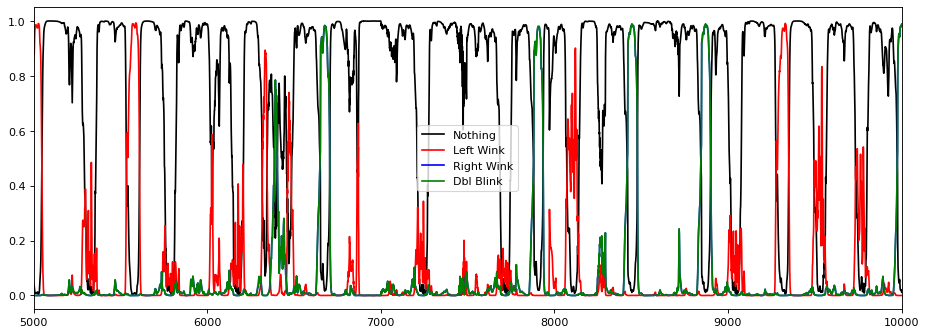

In [21]:
# Plot the predictions alongside the actual ranges
# Looks to be 100% correct at least when deciding Left VS Right
# Mostly just the borders which are wrong (so not really an issue)

# Should add additional check which uses the output of this neural network itself as a feature.
# eg. The ANN needs to output "Left" or "Right" for 90% (or 50%?) of a sequence 0.1 seconds long.

plt.figure(figsize=(14, 5), dpi=80)


predictions = model.predict(test_data)
predictions = tf.nn.softmax(predictions, axis=1)
model_2_NoneReduce
pred_none = np.array([i[0] for i in predictions])
pred_left = np.array([i[1] for i in predictions])
pred_right = np.array([i[2] for i in predictions])
pred_select  = np.array([i[3] for i in predictions])

print(pred_none)
print(pred_left)
print(pred_right)
print(pred_select)

plt.plot(pred_none,  color=EVENT_COLOR_MAP[None], label=EVENT_ID_NAME_MAP[0])
plt.plot(pred_left,  color=EVENT_COLOR_MAP["L"],  label=EVENT_ID_NAME_MAP[1])
plt.plot(pred_right, color=EVENT_COLOR_MAP["R"],  label=EVENT_ID_NAME_MAP[2])
plt.plot(pred_right, color=EVENT_COLOR_MAP["S"],  label=EVENT_ID_NAME_MAP[3])

plt.xlim(5000, 10000)
plt.legend()

plt.show()

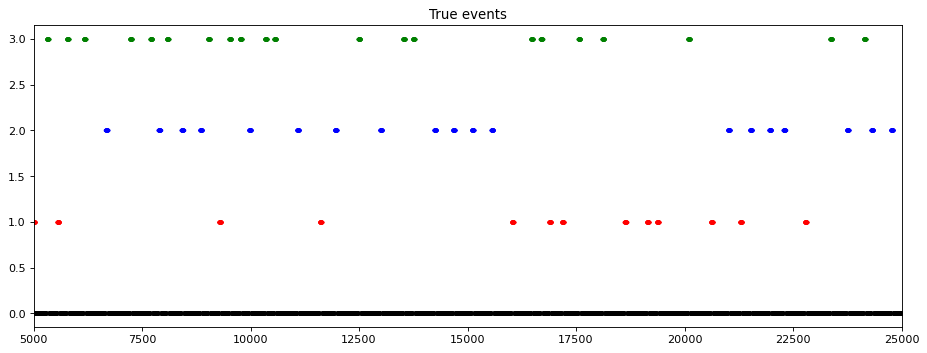

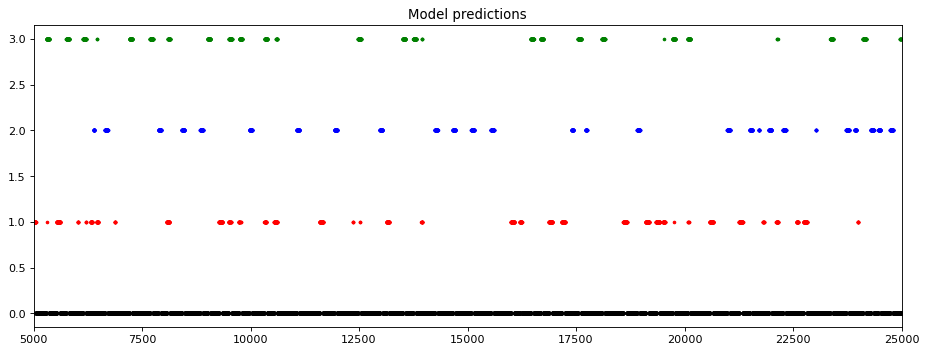

In [23]:
xlim_lower = 5000
xlim_upper = 25000

# True events
plt.figure(figsize=(14, 5), dpi=80)
for i in range(4):
    x = np.array(range(len(test_labels)))[test_labels == i]
    y = test_labels[test_labels == i]
    plt.scatter(x, y, color=EVENT_COLOR_MAP[EVENT_ID_LETTER_MAP[i]], s=5)
    
plt.xlim(xlim_lower, xlim_upper)
plt.title("True events")
plt.show()


# Final preds
event_pred = np.argmax(predictions, axis=1)
plt.figure(figsize=(14, 5), dpi=80)
for i in range(4):
    x = np.array(range(len(event_pred)))[event_pred == i]
    y = event_pred[event_pred == i]
    plt.scatter(x, y, color=EVENT_COLOR_MAP[EVENT_ID_LETTER_MAP[i]], s=5)
    
plt.xlim(xlim_lower, xlim_upper)
plt.title("Model predictions")
plt.show()

<Figure size 1120x240 with 0 Axes>

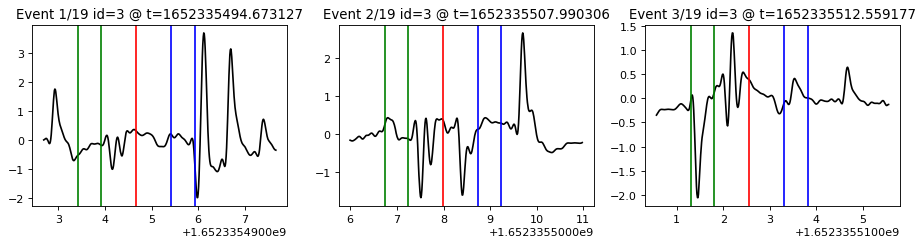

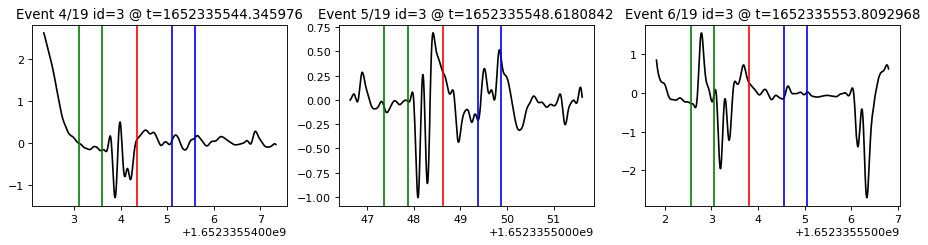

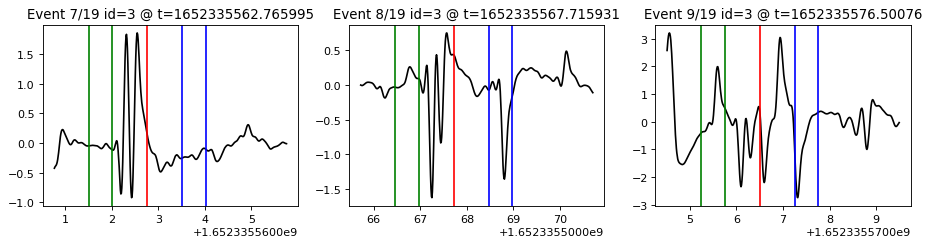

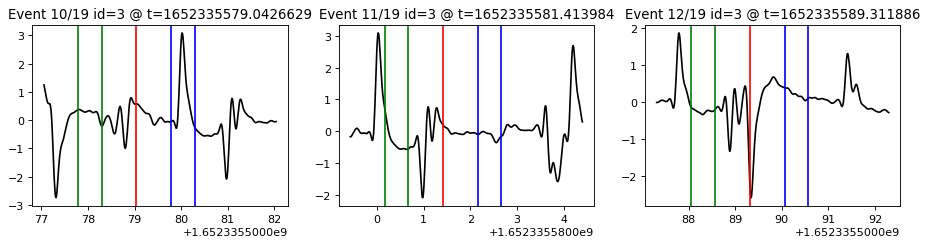

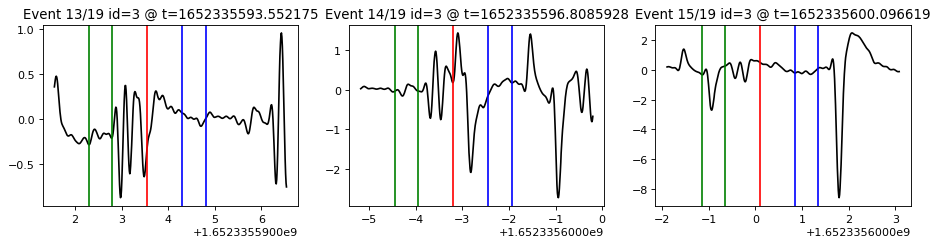

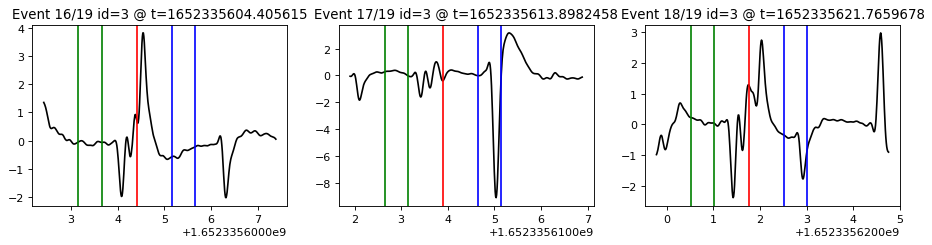

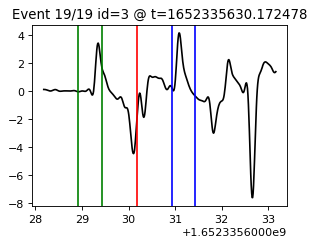

In [24]:
from data_load import load_sample_data, load_event_data, downsample
from data_transform import LP_Filter

# PLOT_FILE_NAME = FILE_NAMES_TRAIN[0]
PLOT_FILE_NAME = FILE_NAMES_TEST[0]

samples_df = load_sample_data(SAMPLES_PATH + PLOT_FILE_NAME)
samples_df["sample"] = LP_Filter(samples_df["sample"], cutOff=7)
samples_df = downsample(samples_df, n=DOWNSAMPLE_RATE)

events_df = load_event_data(
    file_path = EVENTS_PATH + PLOT_FILE_NAME,
    event_id_map = EVENT_ID_MAP,
    event_color_map = EVENT_COLOR_MAP,
)

plot_samples_events_individual(
    samples_df, events_df, 
    event_id = 3,
    
    event_length = EVENT_LENGTH,
    event_start = EVENT_START,
    event_end = EVENT_END,
    
    event_sample_count = 500,
    event_sample_offset = -200,
)

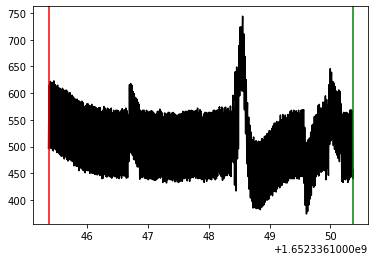

In [17]:
# PLOT_FILE_NAME = FILE_NAMES_TRAIN[2]
PLOT_FILE_NAME = FILE_NAMES_TEST[1]

samples_df = load_sample_data(SAMPLES_PATH + PLOT_FILE_NAME)
# samples_df = downsample(samples_df, n=DOWNSAMPLE_RATE)

ts = 1652336145.37
te = ts + 5
sint_df = samples_df[(samples_df["time_sec"] >= ts) & (samples_df["time_sec"] <= te)]

plt.plot(sint_df["time_sec"], sint_df["sample"], color="black")
plt.axvline(x=ts, color="red")
plt.axvline(x=te, color="green")
plt.show()

In [8]:
# PLOT_FILE_NAME = FILE_NAMES_TRAIN[2]
PLOT_FILE_NAME = FILE_NAMES_TEST[1]

samples_df = load_sample_data(SAMPLES_PATH + PLOT_FILE_NAME)
samples_df = downsample(samples_df, n=DOWNSAMPLE_RATE)

ts = 1652336145.37
te = t + 1
sint_df = samples_df[(samples_df["time_sec"] >= ts) & (samples_df["time_sec"] <= te)]

plt.plot(sint_df["time_sec"], sint_df["sample"], color="black")
plt.axvline(x=t, color="red")
plt.show()

NameError: name 't' is not defined

In [24]:
model.save("models/model_2_NoneReduce75.h5")